In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

abalone = fetch_ucirepo(id=1)

In [4]:
X = abalone.data.features
y = abalone.data.targets

In [5]:
df = X.copy()
df['Rings'] = y

#EDA

In [6]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Пропусков нет, есть 1 категориальный признак

In [8]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole_weight'}>,
        <Axes: title={'center': 'Shucked_weight'}>,
        <Axes: title={'center': 'Viscera_weight'}>],
       [<Axes: title={'center': 'Shell_weight'}>,
        <Axes: title={'center': 'Rings'}>, <Axes: >]], dtype=object)

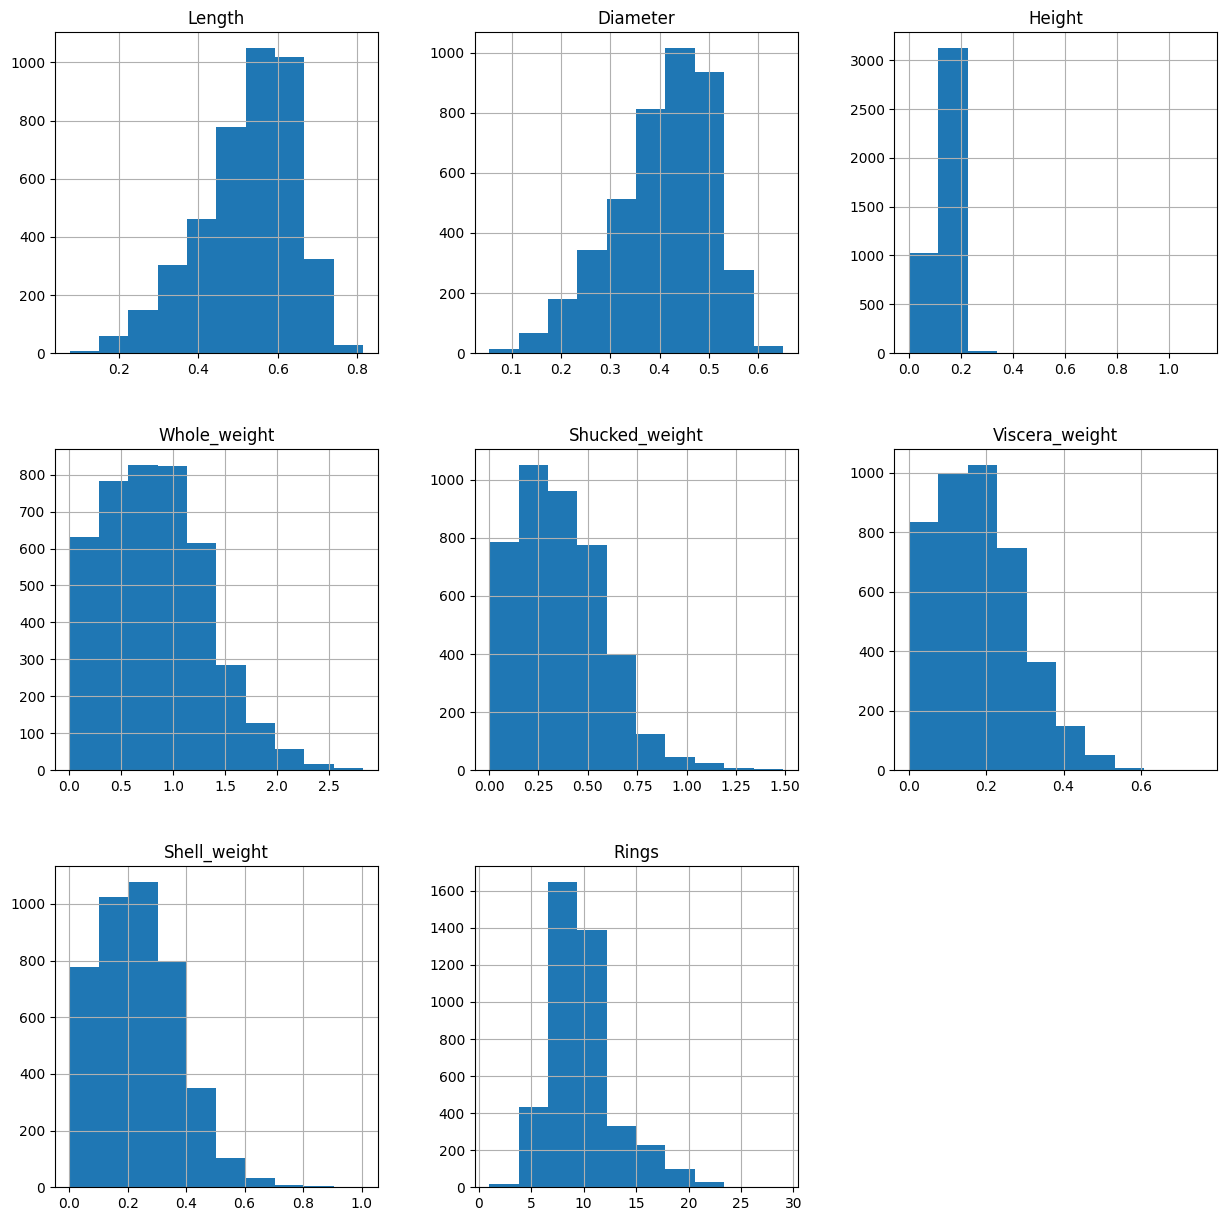

In [9]:
df.hist(figsize=(15,15))

In [13]:
X.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

Заменим пол на числовые значения с помощью OneHotEncoder, так как мы не можем сравнить его значения между собой

In [14]:
from sklearn.preprocessing import OneHotEncoder

sex_col = df[['Sex']]

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(sex_col)

encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(['Sex']),
    index=X.index
)

df_en = pd.concat([df, encoded_df], axis=1)

In [15]:
df_en = df_en.drop(['Sex'], axis=1)

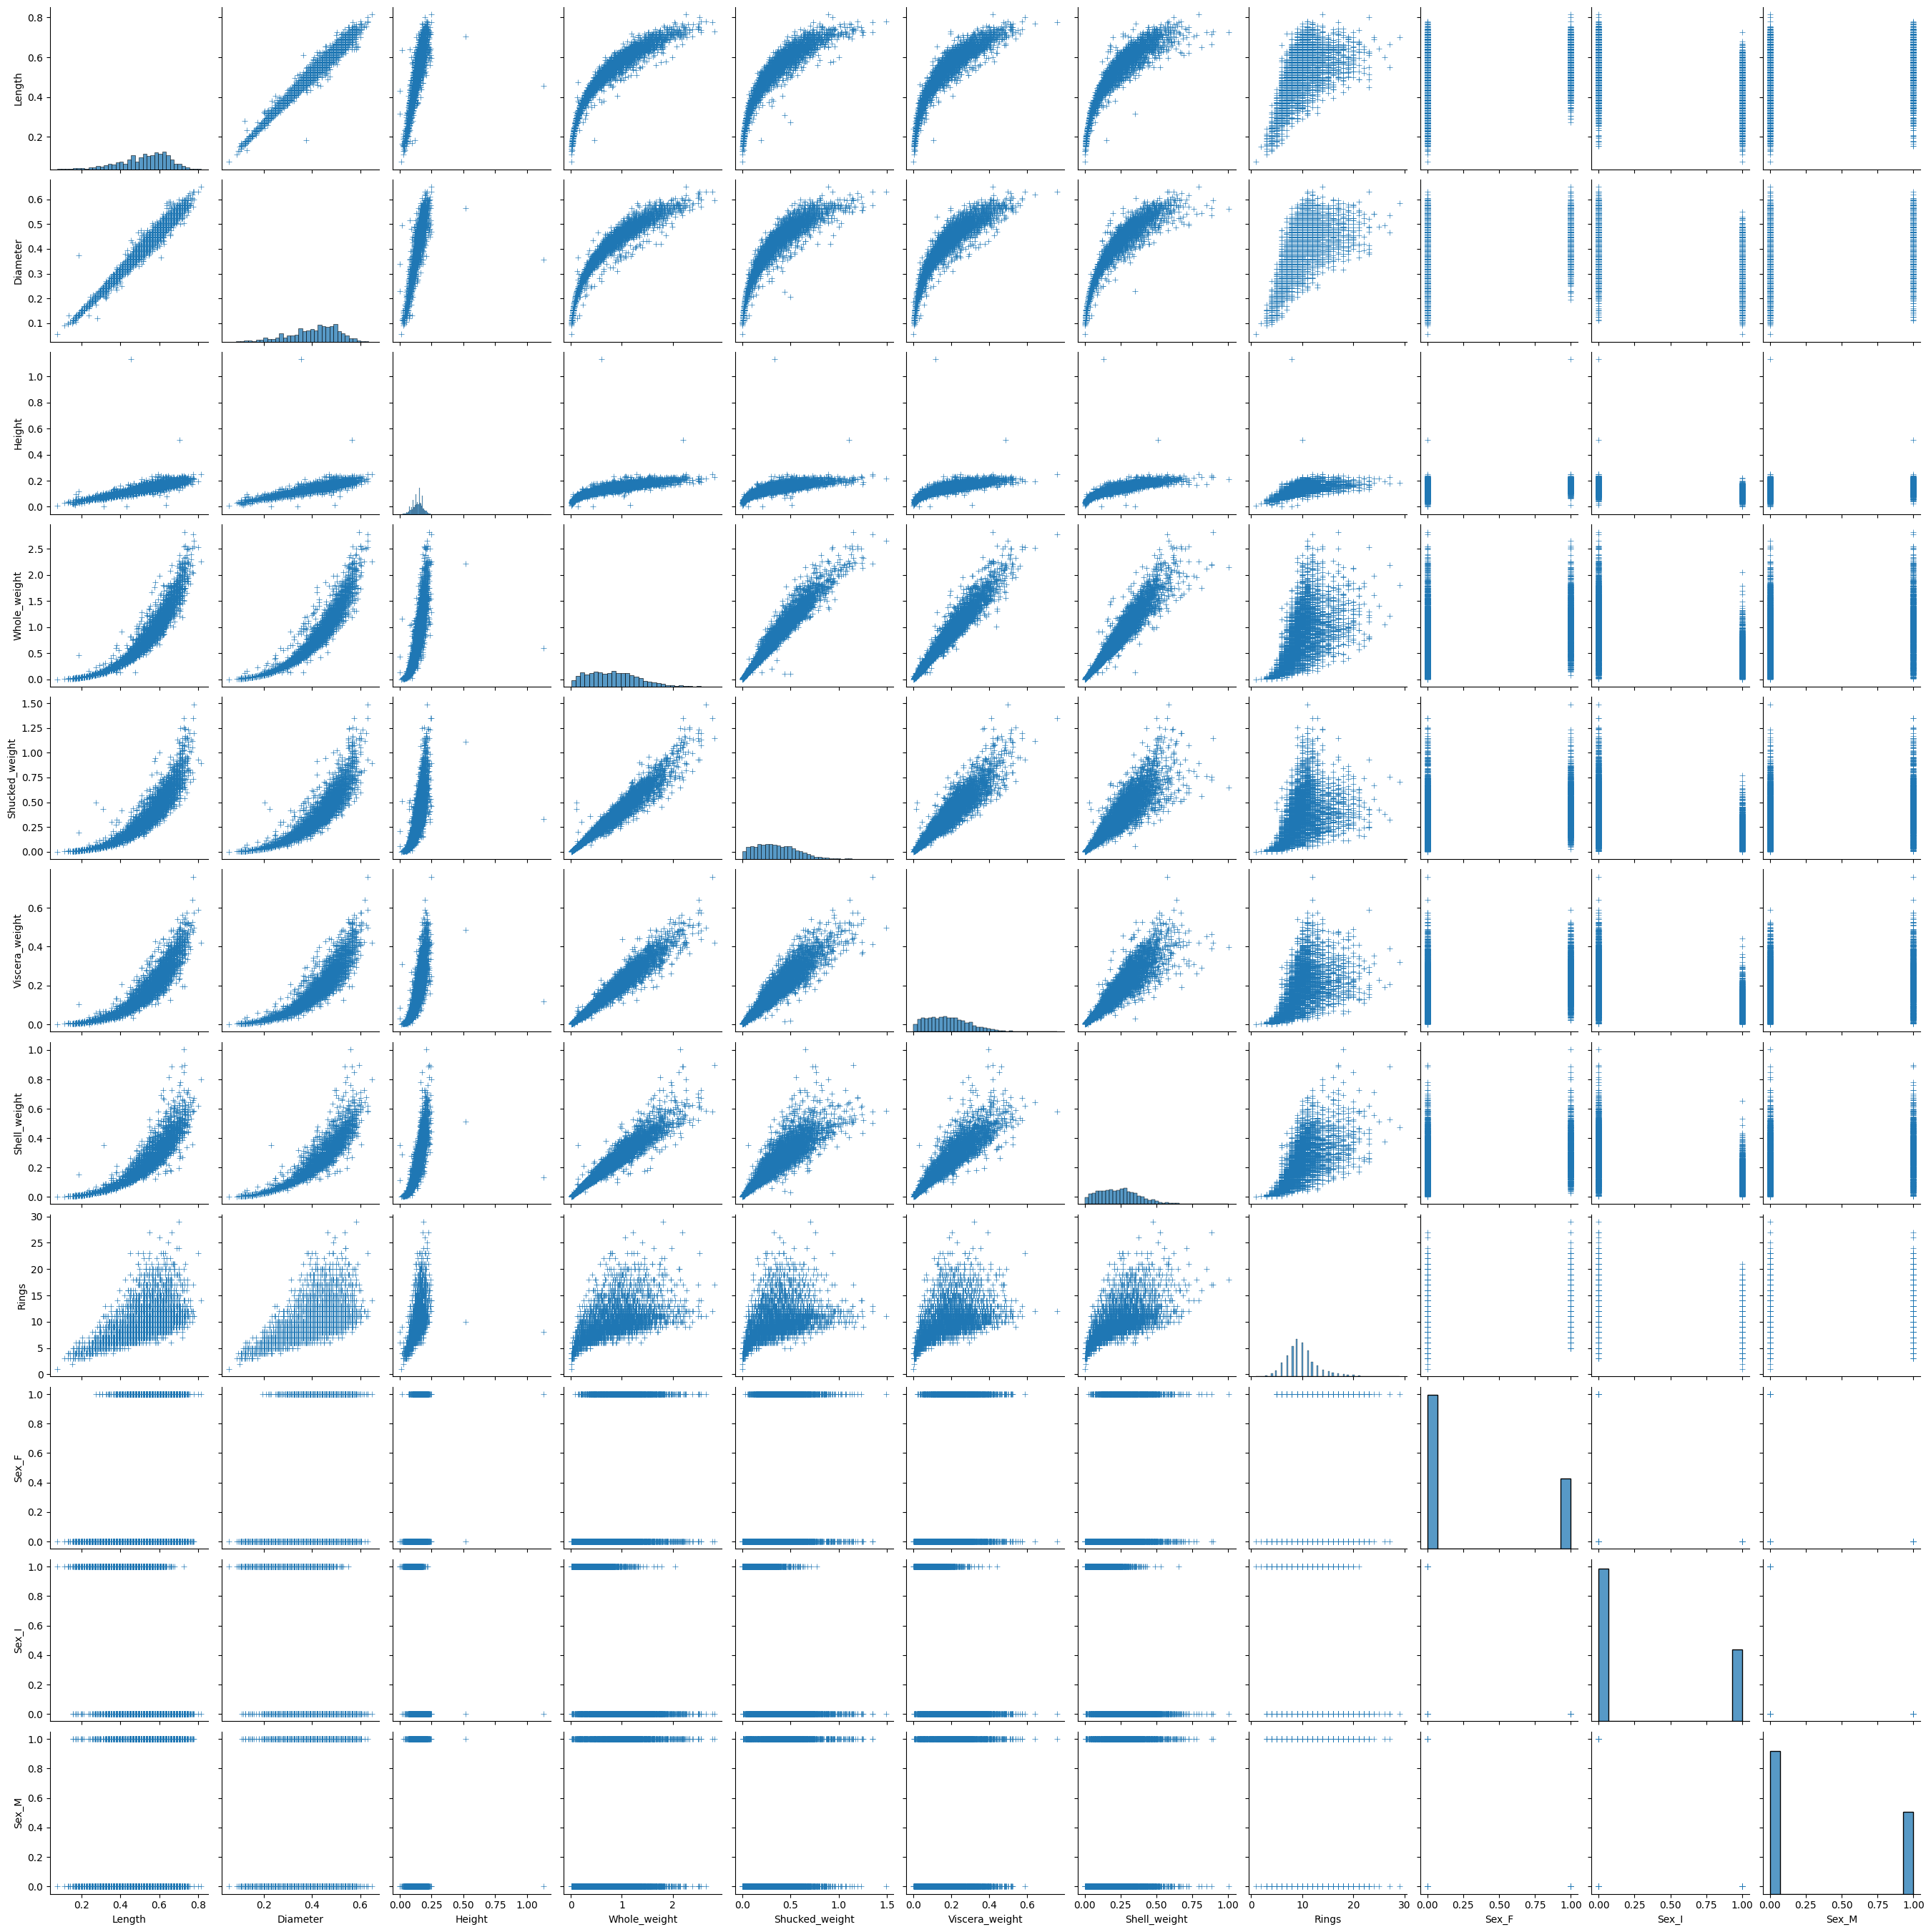

In [ ]:
sns.pairplot(df_en, markers='+')

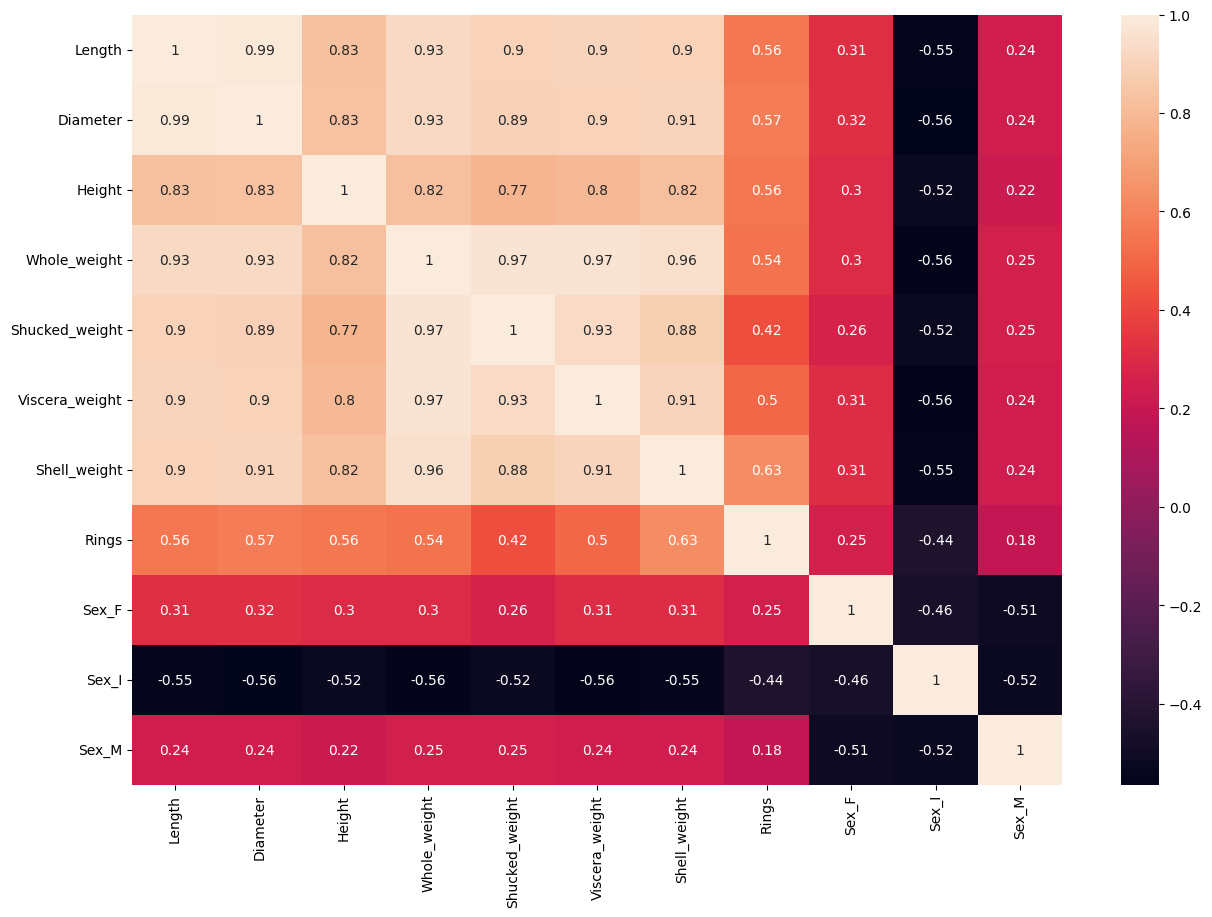

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_en.corr(), annot=True)
plt.show()

на целивую переменую в большей степени влияют параметры размеров

Проверим важность каждого признака

In [18]:
X = df_en.drop('Rings', axis=1)
y = df_en['Rings']

In [19]:
from sklearn.ensemble import RandomForestRegressor

rndForest = RandomForestRegressor(n_estimators=100, random_state=43)
rndForest.fit(X, y)

feat_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rndForest.feature_importances_
}).sort_values(by='importance', ascending=False)
feat_importances

,feature,importance
6,Shell_weight,0.494591
4,Shucked_weight,0.163676
3,Whole_weight,0.083017
5,Viscera_weight,0.072390
1,Diameter,0.054704
2,Height,0.051715
0,Length,0.048838
8,Sex_I,0.019573
7,Sex_F,0.005770
9,Sex_M,0.005726


In [20]:
from sklearn.inspection import permutation_importance

res = permutation_importance(rndForest, X, y, n_repeats=10, n_jobs=-1, random_state=12)

sorted_idx = res.importances_mean.argsort()[::-1]

for i in sorted_idx:
    print(f"{X.columns[i]}:" f"{res.importances_mean[i]:.4f} ")

Shell_weight:1.6436 
Shucked_weight:1.0624 
Whole_weight:0.2372 
Viscera_weight:0.1462 
Height:0.1400 
Diameter:0.0958 
Length:0.0923 
Sex_I:0.0708 
Sex_M:0.0079 
Sex_F:0.0078 


* Больше всего важность у Shell_weight, он больше всего и коррелировал с целевой переменной
* Меньше всего у пола

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

gradBoost = GradientBoostingRegressor(random_state=11)
gradBoost.fit(X, y)

feat_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': gradBoost.feature_importances_
}).sort_values(by='importance', ascending=False)
feat_importances

,feature,importance
6,Shell_weight,0.674831
4,Shucked_weight,0.172283
3,Whole_weight,0.040913
2,Height,0.038677
8,Sex_I,0.025806
1,Diameter,0.020818
5,Viscera_weight,0.013662
0,Length,0.010402
7,Sex_F,0.002311
9,Sex_M,0.000299


In [22]:
from sklearn.inspection import permutation_importance

res = permutation_importance(gradBoost, X, y, n_repeats=10, n_jobs=-1, random_state=12)

sorted_idx = res.importances_mean.argsort()[::-1]

for i in sorted_idx:
    print(f"{X.columns[i]}:" f"{res.importances_mean[i]:.4f} ")

Shucked_weight:1.3304 
Shell_weight:0.8535 
Whole_weight:0.2359 
Height:0.0813 
Diameter:0.0297 
Sex_I:0.0284 
Viscera_weight:0.0244 
Length:0.0161 
Sex_F:0.0012 
Sex_M:0.0000 


На градиентом бустенге примерно такие же результаты как у рандом фораста.
Только первое и второе место поменялись местами

#Обучим модели

In [23]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt


def train_models(X=None, y=None, test_size=0.2, random_state=42):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    models = {
      "RandomForest": RandomForestRegressor(random_state=random_state),
      "GradientBoosting": GradientBoostingRegressor(random_state=random_state)
    }

    param_grid_rf = {
        "model__n_estimators": [200, 400],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5],
        "model__min_samples_leaf": [1, 3]
    }

    param_grid_gb = {
        "model__n_estimators": [100, 200],
        "model__learning_rate": [0.05, 0.1],
        "model__max_depth": [2, 3, 4]
    }

    grids = {
        "RandomForest": param_grid_rf,
        "GradientBoosting": param_grid_gb
    }

    results = {}

    for name, model in models.items():
        print(f"\n=== Обучение модели: {name} ===")

        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("model", model)
        ])

        grid = GridSearchCV(
            pipe,
            grids[name],
            cv=3,
            n_jobs=-1,
            scoring="neg_mean_absolute_error"
        )

        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        results[name] = {
            "model": best_model,
            "MAE": mae,
            "RMSE": rmse,
            "R2": r2,
            "Best Params": grid.best_params_
        }

        print(f"Лучшие параметры: {grid.best_params_}")
        print(f"MAE:  {mae:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R2:   {r2:.4f}")


    print("\n\n=== Сравнение моделей ===\n")
    df_compare = pd.DataFrame([
        {
            "Model": name,
            "MAE": res["MAE"],
            "RMSE": res["RMSE"],
            "R2": res["R2"]
        }
        for name, res in results.items()
    ])

    print(df_compare)

    return results, df_compare


Обучем не на всех признаках так как диаметр дублирует информации о размерах

In [25]:
X = df_en.drop(['Rings', 'Diameter'], axis=1)
y = df_en['Rings']

In [26]:
results, compare = train_models(X, y)


=== Обучение модели: RandomForest ===
Лучшие параметры: {'model__max_depth': 10, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2, 'model__n_estimators': 400}
MAE:  1.5439
RMSE: 2.2166
R2:   0.5461

=== Обучение модели: GradientBoosting ===
Лучшие параметры: {'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 100}
MAE:  1.5620
RMSE: 2.2500
R2:   0.5324


=== Сравнение моделей ===

              Model       MAE      RMSE        R2
0      RandomForest  1.543901  2.216610  0.546119
1  GradientBoosting  1.562022  2.249961  0.532358


In [27]:
X

,Length,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0.0,1.0
1,0.350,0.090,0.2255,0.0995,0.0485,0.0700,0.0,0.0,1.0
2,0.530,0.135,0.6770,0.2565,0.1415,0.2100,1.0,0.0,0.0
3,0.440,0.125,0.5160,0.2155,0.1140,0.1550,0.0,0.0,1.0
4,0.330,0.080,0.2050,0.0895,0.0395,0.0550,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.165,0.8870,0.3700,0.2390,0.2490,1.0,0.0,0.0
4173,0.590,0.135,0.9660,0.4390,0.2145,0.2605,0.0,0.0,1.0
4174,0.600,0.205,1.1760,0.5255,0.2875,0.3080,0.0,0.0,1.0
4175,0.625,0.150,1.0945,0.5310,0.2610,0.2960,1.0,0.0,0.0


Попробучем обучить на других признаках

In [29]:
X2 = df_en.drop(['Rings', 'Length', 'Height', 'Shucked_weight'], axis=1)
y2 = df_en['Rings']

In [30]:
results2, compare2 = train_models(X2, y2)


=== Обучение модели: RandomForest ===
Лучшие параметры: {'model__max_depth': 10, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2, 'model__n_estimators': 400}
MAE:  1.6531
RMSE: 2.3316
R2:   0.4978

=== Обучение модели: GradientBoosting ===
Лучшие параметры: {'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}
MAE:  1.6450
RMSE: 2.3381
R2:   0.4950


=== Сравнение моделей ===

              Model       MAE      RMSE        R2
0      RandomForest  1.653136  2.331613  0.497800
1  GradientBoosting  1.645016  2.338062  0.495018


Обучим на всех признаках

In [31]:
X3 = df_en.drop(['Rings'], axis=1)
y3 = df_en['Rings']

In [32]:
results3, compare3 = train_models(X3, y3)


=== Обучение модели: RandomForest ===
Лучшие параметры: {'model__max_depth': 10, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2, 'model__n_estimators': 400}
MAE:  1.5432
RMSE: 2.2108
R2:   0.5485

=== Обучение модели: GradientBoosting ===
Лучшие параметры: {'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 100}
MAE:  1.5602
RMSE: 2.2497
R2:   0.5324


=== Сравнение моделей ===

              Model       MAE      RMSE        R2
0      RandomForest  1.543240  2.210835  0.548481
1  GradientBoosting  1.560215  2.249740  0.532450


метрики на всех параметрах примерно такиеже как и когда мы убрали Diameter

Модели демонстрируют примерно равные метрики